# Clean-and-Analyze-Employee-Exit-Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

The `DETE exit survey data` is available from: https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey. <br>
The original `TAFE exit survey data` is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

Learning source: `DataQuest`

### In this project, we will try to answer the following questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns from `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey.
- `SeparationType`: The reason why the person's employment ended.
- `Cease Date`: The year or month the person's employment ended.
- `DETE Start Date`: The year the person began employment with the DETE.

Below is a preview of a couple columns from `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey.
- `Reason for ceasing employment`: The reason why the person's employment ended.
- `LengthofServiceOverall`: Overall Length of Service at Institute (in years): The length of the person's employment (in years).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None # ignore warning

%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
print(dete_survey.info())
display(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check the unique values in all columns except ID

for col in dete_survey.columns[1:]:
    print(dete_survey[col].value_counts())

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64
Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: count, dtype: int64
DETE Start Date
Not Stated    73
2011          40
2007          34
2008     

In [4]:
print(tafe_survey.info())
display(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

#### - Comment:
1. Some entries in columns in `dete_survey` are "Not Stated", meaning "NaN".
2. Based on the values in some of the columns in `tafe_survey`, we can assume the codes in `dete_survey` probably correspond to - <br> Agree(A), Strongly Agree(SA), Neutral(N), Disagree(D), Strongly Disagree(SD) and Missing(M).
3. Some columns in both the dataframes are asking very similar questions.

### Data Cleaning
1. Read `dete_survey.csv` file into pandas again, but this time read the **Not Stated** values in as **NaN**.
2. Drop the following columns from `dete_survey`: dete_survey.columns[28:49], assign the result to `dete_survey_updated`.
3. Drop the following columns from `tafe_survey`: tafe_survey.columns[17:66], assign the result to `tafe_survey_updated`.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Rename the remaining columns in the `dete_survey_updated`.
1. Make all the capitalization lowercase.
2. Remove any trailing whitespace from the end of the strings.
3. Replace spaces with underscores ('_').

In [8]:
list(dete_survey_updated.columns)

['ID',
 'SeparationType',
 'Cease Date',
 'DETE Start Date',
 'Role Start Date',
 'Position',
 'Classification',
 'Region',
 'Business Unit',
 'Employment Status',
 'Career move to public sector',
 'Career move to private sector',
 'Interpersonal conflicts',
 'Job dissatisfaction',
 'Dissatisfaction with the department',
 'Physical work environment',
 'Lack of recognition',
 'Lack of job security',
 'Work location',
 'Employment conditions',
 'Maternity/family',
 'Relocation',
 'Study/Travel',
 'Ill Health',
 'Traumatic incident',
 'Work life balance',
 'Workload',
 'None of the above',
 'Gender',
 'Age',
 'Aboriginal',
 'Torres Strait',
 'South Sea',
 'Disability',
 'NESB']

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated = dete_survey_updated.rename({'separationtype':'separation_type'}, axis=1)
list(dete_survey_updated.columns)

['id',
 'separation_type',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb']

### Update the columns below in `tafe_survey_updated`.
1. 'Record ID': 'id'
2. 'CESSATION YEAR': 'cease_date'
3. 'Reason for ceasing employment': 'separationtype'
4. 'Gender. What is your Gender?': 'gender'
5. 'CurrentAge. Current Age': 'age'
6. 'Employment Type. Employment Type': 'employment_status'
7. 'Classification. Classification': 'position'
8. 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
9. 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [10]:
# create a dictionary to match the old and new column names
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 
          'Reason for ceasing employment': 'separation_type', 
          'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
          'Employment Type. Employment Type': 'employment_status', 
          'Classification. Classification': 'position', 
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

# rename the columns
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
list(tafe_survey_updated.columns)

['id',
 'Institute',
 'WorkArea',
 'cease_date',
 'separation_type',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

### Select only the data for survey respondents who have a `Resignation` separation type.
- Remember that the `dete_survey_updated` contains 3 Resignation separation types.
- Since we are only interested in employees who resigned, we can remove rows that do not meet this criterion.
- Assign the result for `dete_survey_updated` to `dete_resignations`.
- Assign the result for `tafe_survey_updated` to `tafe_resignations`.

In [11]:
print(dete_survey_updated['separation_type'].value_counts(dropna=False))
print(tafe_survey_updated['separation_type'].value_counts(dropna=False))

separation_type
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64
separation_type
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: count, dtype: int64


In [12]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separation_type'].str[:11] == 'Resignation']
dete_resignations.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separation_type'] == 'Resignation']
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Check the years in each dataframe for logical inconsistencies.
#### Clean the cease_date column in dete_resignations.
- View the unique values in the cease_date column and extract the year. 
- Check the values in the cease_date and dete_start_date columns in `dete_resignations` and the cease_date column in `tafe_resignations`.

In [14]:
# Check the unique value ofb 'cease_date'
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [15]:
# Extract the year only
cease = dete_resignations['cease_date'].str[-4:]
dete_resignations['cease_date'] = cease.astype(float)
dete_resignations['cease_date'].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [16]:
# For tafe_resignations['cease_date']
tafe_resignations['cease_date'].value_counts()

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64

In [17]:
# Check the mininum year of cease_date is greater than start date
print(dete_resignations['dete_start_date'].min())
print(dete_resignations['cease_date'].min())

1963.0
2006.0


In [18]:
#check if cease_date is greater than start_date in each rows
(dete_resignations['cease_date'] - dete_resignations['dete_start_date']).unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

- Comment: All values are greater than 0, meaning the data is reasonable.

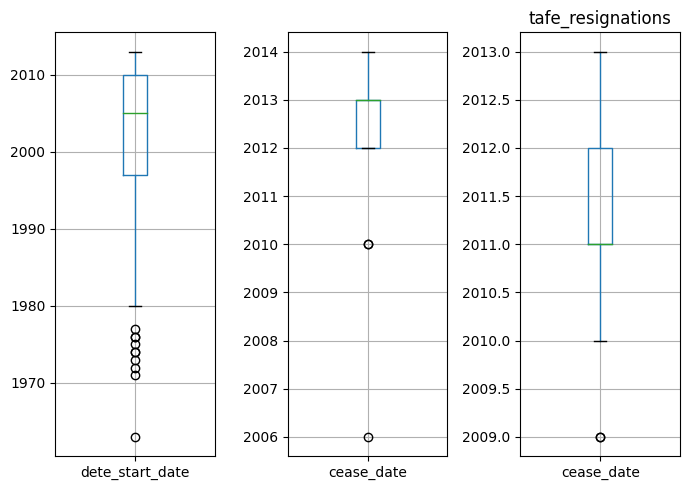

In [19]:
fig, axes = plt.subplots(1,3, figsize=(7,5))
dete_resignations.boxplot('dete_start_date', ax=axes[0])
dete_resignations.boxplot('cease_date', ax=axes[1])
tafe_resignations.boxplot('cease_date', ax=axes[2])
axes[2].set_title('tafe_resignations')
plt.tight_layout()

### Create a new column `institute_service` in dete_resignations
- Subtract the `dete_start_date` from the `cease_date`.

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

<Axes: ylabel='institute_service'>

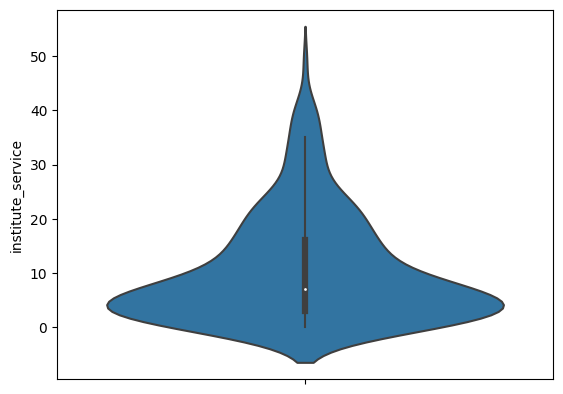

In [21]:
sns.violinplot(data=dete_resignations, y='institute_service')

- Comment: Most of the employee resigned within 7 years.

### Categorize employees as "dissatisfied" from each dataframe.
#### 1. tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
- Contributing Factors. Interpersonal Conflict

#### 2. dete_survey_updated:
- interpersonal_conflicts
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment-
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If an employee indicated "**true**" for any of the above factors, we will mark them as dissatisfied in a new column.

In [22]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('-'*20)
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))
print('-'*20)
print(tafe_resignations['Contributing Factors. Interpersonal Conflict'].value_counts(dropna=False))

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64
--------------------
Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64
--------------------
Contributing Factors. Interpersonal Conflict
-                         308
Interpersonal Conflict     24
NaN                         8
Name: count, dtype: int64


In [23]:
# defining a function to update TAFE values to True, False, or NaN
def update_values(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [24]:
cols = ['Contributing Factors. Dissatisfaction', 
        'Contributing Factors. Job Dissatisfaction', 
        'Contributing Factors. Interpersonal Conflict']

tafe_resignations[cols] = tafe_resignations[cols].applymap(update_values)

In [25]:
#create a new column called dissatisfied
tafe_resignations['dissatisfied'] = tafe_resignations[cols].any(axis=1, skipna=False)
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))
print(tafe_resignations.shape)

dissatisfied
False    235
True     105
Name: count, dtype: int64
(340, 24)


In [26]:
#List of DETE columns indicating dissatisfaction
dete_diss = ['interpersonal_conflicts', 
'job_dissatisfaction', 
'dissatisfaction_with_the_department', 
'physical_work_environment', 
'lack_of_recognition', 
'lack_of_job_security', 
'work_location', 
'employment_conditions', 
'work_life_balance', 
'workload']

#creating 'dissatisfactied' column in dete_resignations
dete_resignations['dissatisfied'] = dete_resignations[dete_diss].any(axis=1, skipna=False)
print(dete_resignations['dissatisfied'].value_counts(dropna=False))
print(dete_resignations.shape)

dissatisfied
False    157
True     154
Name: count, dtype: int64
(311, 37)


In [27]:
dete_resignations.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


### Combine the Data
First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
- Add a column named institute to dete_resignations_up. Each row should contain the value DETE.
- Add a column named institute to tafe_resignations_up. Each row should contain the value TAFE.
- Combine the dataframes. Assign the result to combined.
- Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Drop any columns with less than 500 non null values.
- Remember that you can drop columns with less than a certain number of non null values with the thresh parameter.
- Assign the result to combined_updated.

In [28]:
dete_resignations = dete_resignations.assign(institute='DETE')
tafe_resignations = tafe_resignations.assign(institute='TAFE')

In [29]:
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)
combined.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separation_type                                      651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

### Drop columns with under 500 non-null values. 
This will remove redundant columns that are no longer relevant to our combined data set.

In [31]:
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separation_type    651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [32]:
combined_updated.institute_service.unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

### Cleaning the 'institute_service' Column
The 'institute_service' column currently contains data in both ranges and float. We'll sort all the data into the following ranges:

1. New: Less than 3 years at a company
2. Experienced: 3-6 years at a company
3. Established: 7-10 years at a company
4. Veteran: 11 or more years at a company

I'm also going to drop rows that have NaN values for institute_service from the dataset.

There are 88 entries with null institute_service, 14% of entries overall. We will not lose too much data by excluding them from our analysis.

In [33]:
# Dropping rows with NaN service years from dataset
combined_cleaned = combined_updated.dropna(subset=['institute_service'])
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 563 non-null    float64
 1   separation_type    563 non-null    object 
 2   cease_date         561 non-null    float64
 3   position           560 non-null    object 
 4   employment_status  563 non-null    object 
 5   gender             558 non-null    object 
 6   age                561 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       563 non-null    bool   
 9   institute          563 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 44.5+ KB


In [34]:
# Using string methods to extract a single float value for years of service
years = combined_cleaned['institute_service'].astype(str)
years = years.str.split('-').str.get(0)
years = years.str.replace('Less than 1 year', '0').str.replace('More than 20 years', '20')
years = years.astype(float)
years.describe()

count    563.000000
mean       6.937833
std        8.353705
min        0.000000
25%        1.000000
50%        4.000000
75%       10.000000
max       49.000000
Name: institute_service, dtype: float64

In [35]:
# Checking TAFE ranges to ensure that the function I build works accurately,
# keeping in mind that I extracted the first year of the range
tafe_resignations['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

In [36]:
# Defining a function to convert the years float into one of the categories
def categorize(year):
    if year < 3:
        return 'New: Less than 3 years'
    elif year <= 6:
        return 'Experienced: 3-6 years'
    elif year <= 10:
        return 'Established: 7-10 years'
    else:
        return 'Veteran: 11 or more years'

In [37]:
# Applying the categorize function to years
cat_years = years.apply(categorize)
cat_years.value_counts()

institute_service
New: Less than 3 years       193
Experienced: 3-6 years       172
Veteran: 11 or more years    136
Established: 7-10 years       62
Name: count, dtype: int64

In [38]:
# creating a new column for the categorized years of service
combined_cleaned.loc[:, 'service_cat'] = cat_years.copy()

# checking the combined_cleaned dataset and the 'service_cat' column
combined_cleaned.head()

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established: 7-10 years
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran: 11 or more years
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced: 3-6 years
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran: 11 or more years
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced: 3-6 years


In [39]:
combined_cleaned['service_cat'].value_counts()

service_cat
New: Less than 3 years       193
Experienced: 3-6 years       172
Veteran: 11 or more years    136
Established: 7-10 years       62
Name: count, dtype: int64

### 1. Analyzing Service Years and Dissatisfaction
Use the cleaned data to see if there's any relationship between dissatisfaction when resigning and years of service.

Build a **pivot table** using the years of service category as the index and dissatisfaction as the value. Since dissatisfaction is a Boolean value of 1 and 0 in Pandas, calculating the average of the pivot table preset executions will give the proportion of dissatisfied employees in each category.

Then, create a bar chart showing the proportion of dissatisfied employees in each seniority category.

In [40]:
# Checking the dissatisfied column
combined_cleaned['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    339
True     224
Name: count, dtype: int64

In [41]:
# Initially encountered an error when setting up the pivot table
# Checking the datatype of 'dissatisfied'
# If it's object, so needs to be changed to bool
combined_cleaned.dtypes

id                   float64
separation_type       object
cease_date           float64
position              object
employment_status     object
gender                object
age                   object
institute_service     object
dissatisfied            bool
institute             object
service_cat           object
dtype: object

,dissatisfied
service_cat,
New: Less than 3 years,0.321244
Experienced: 3-6 years,0.354651
Established: 7-10 years,0.516129
Veteran: 11 or more years,0.507353


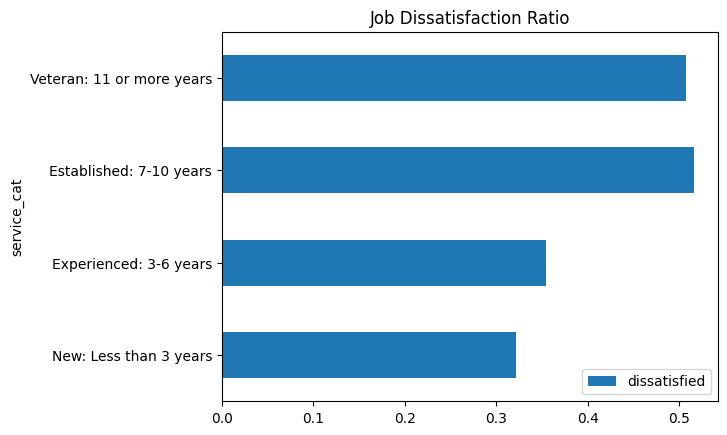

In [42]:
# Creating a pivot table with index=service_cat and values=dissatisfied
column_order = ['New: Less than 3 years', 'Experienced: 3-6 years', 
                'Established: 7-10 years', 'Veteran: 11 or more years']

years_dis = combined_cleaned.pivot_table(index='service_cat', values='dissatisfied')
years_dis = years_dis.reindex(column_order, axis=0)
display(years_dis)

# Displaying bar plot of % dissatisfaction by category years of service
years_dis.plot.barh(title='Job Dissatisfaction Ratio')
plt.show()

### Conclusions - Dissatisfaction with Years of Service
The chart above shows that employees with longer service are more likely to cite dissatisfaction as a reason than those who left earlier.

- Those who have been employed for less than three years and those who have been employed for 3-6 years have similar dissatisfaction rates, 32% and 35% respectively.
- Similar levels of dissatisfaction were found among those who had worked for more than 7-10 years and more than 11 years, at 52% and 51% respectively.

One possible explanation for this is that early-career employees are less attached to the organization and are more likely to quit for other reasons, such as new job opportunities.
And employees who have been with the organization for seven years or more are more attached and less likely to quit. Unless they are dissatisfied, resign.

One direction for further analysis would be to look at employees who have left for other reasons and compare their dissatisfaction rates and career stages with those of employees who quit.

### 2. Analyzing Dissatisfaction by Gender and Age
To see if gender and age correlate with dissatisfaction in resigning employees.

- The gender column is ready to go.
- The age column need to be cleaned into consistent categories first.

In [43]:
print(combined_cleaned['gender'].value_counts(dropna=False))

gender
Female    397
Male      161
NaN         5
Name: count, dtype: int64


,dissatisfied
gender,
Female,0.395466
Male,0.403727


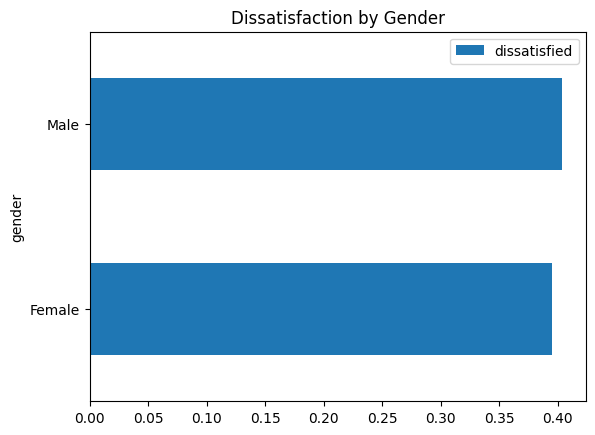

In [44]:
# By gender
table = combined_cleaned.pivot_table(index='gender', values='dissatisfied')
display(table)

table.plot.barh(title='Dissatisfaction by Gender')
plt.show()

In [45]:
# By age group
combined_cleaned['age'].value_counts()

age
51-55            69
41  45           45
41-45            44
46  50           39
36-40            36
46-50            34
21  25           33
31  35           32
36  40           32
26  30           32
26-30            31
56 or older      29
31-35            29
21-25            26
56-60            22
61 or older      18
20 or younger    10
Name: count, dtype: int64

In [46]:
combined_cleaned['ages_update'] = combined_cleaned['age'].str[:2].astype('float')
combined_cleaned.ages_update.value_counts()

ages_update
41.0    89
46.0    73
51.0    69
36.0    68
26.0    63
31.0    61
21.0    59
56.0    51
61.0    18
20.0    10
Name: count, dtype: int64

In [47]:
# re-define age group
def age_group(value):
    if value <= 20:
        return "20 and younger"
    elif 21 <= value <= 30:
        return "21 - 30"
    elif 31 <= value <= 40:
        return '31 - 40'
    elif 41 <= value <= 50:
        return '41 - 50'
    elif value >= 51:
        return '51 and older'
    
combined_cleaned['age_group'] = combined_cleaned['ages_update'].apply(age_group)
combined_cleaned['age_group'].value_counts(dropna=False)

age_group
41 - 50           162
51 and older      138
31 - 40           129
21 - 30           122
20 and younger     10
None                2
Name: count, dtype: int64

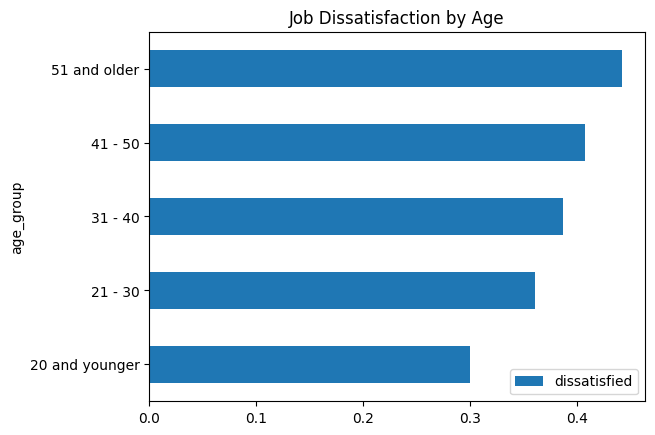

In [48]:
age_table = combined_cleaned.pivot_table(index='age_group', values='dissatisfied')
age_table.plot.barh(title='Job Dissatisfaction by Age')
plt.show()

### Conclusions - Dissatisfaction by Gender and Age
1. Gender is not correlated with dissatisfaction. Women and men had nearly the same dissatisfaction rate when resigning, both are around 40%.

2. The dissatisfaction rates among DETE and TAFE resigned employees increase with age. For employees who resign, dissatisfaction rates are lower among younger workers than among older workers.

### 3. Analyzing Dissatisfaction by Employment Status
To see if employment Status correlate with dissatisfaction in resigning employees.

In [49]:
combined_cleaned.employment_status.value_counts(dropna=False)

employment_status
Permanent Full-time    245
Permanent Part-time    130
Temporary Full-time    120
Temporary Part-time     35
Contract/casual         29
Casual                   4
Name: count, dtype: int64

In [50]:
combined_cleaned['cleaned_employment_status'] = combined_updated['employment_status'].apply(lambda val: 'Contract' if val in ['Contract/casual', 'Casual'] else val)
print(combined_cleaned['cleaned_employment_status'].value_counts(dropna=False))

cleaned_employment_status
Permanent Full-time    245
Permanent Part-time    130
Temporary Full-time    120
Temporary Part-time     35
Contract                33
Name: count, dtype: int64


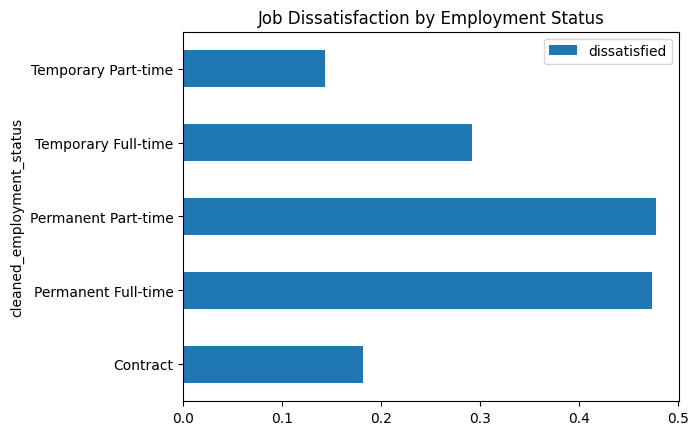

In [51]:
status_table = combined_cleaned.pivot_table(index='cleaned_employment_status', values='dissatisfied')
status_table.plot.barh(title='Job Dissatisfaction by Employment Status')
plt.show()

### 4. Analyzing Dissatisfaction by Institute
To see whether different institute correlate with dissatisfaction in resigning employees.

,dissatisfied
institute,
DETE,0.516484
TAFE,0.286207


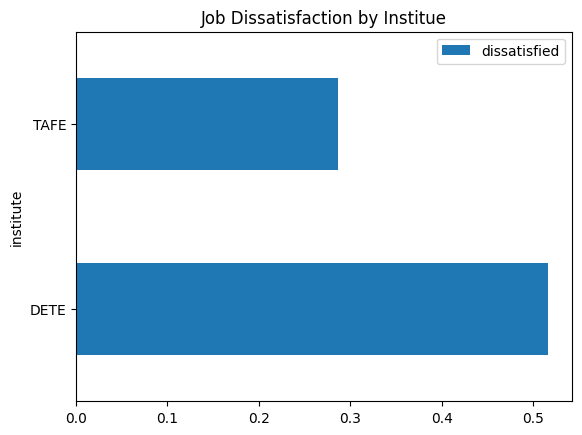

In [52]:
ins_table = combined_cleaned.pivot_table(index='institute', values='dissatisfied')
display(ins_table)
ins_table.plot.barh(title='Job Dissatisfaction by Institue')
plt.show()

## Conclusions
1. Employees with longer service (more than 7 years) are more likely to cite dissatisfaction than those who left earlier.
2. There is no correlation between gender and dissatisfaction. Both male and female are around 40%.
3. Dissatisfaction rates are lower among younger workers than among older workers.
4. Employees with long-term employment status tend to have dissatisfaction than those who have short-term status.
5. Dissatisfaction was more widespread in `DETE` institute, with 51% quitting, compared with just 28% of `TAFE` staff.

Based on the above findings, it is interesting to further analyzed by job position, and further investigate work-life balance between `DETE` and `TAFE` institutes.